# Supervised Learning II
by Mauricio Araya
## (A.K.A. Supervised Learning Lab)

<b>Credit:</b> Guillermo Cabrera, Matthew Graham, and Scikit Learn

(Yes... I will force you to code now...)

## 1.- Regularized Regression... or ridding alone

### Objective
* Understand the effect of the regularization parameters
* Compare Ridge and Lasso
* Warm up!

### Regularization Reminder (slide)

## Exercise
### a) Forging your own Galaxy Photometry/Redshift dataset
* Use my Tuesday's notebook to load the `sdss_gal.csv`
* Downsample the data (use $n=10000$ for example)
* Divide into training and test/validation
* Select the 'u-g' feature (and hack it to be a matrix)

In [36]:
import pandas as pd
import numpy as np
galaxy_feat = pd.read_csv('sdss_gal.csv', low_memory=False)

In [50]:
n=10000
gal_sample = galaxy_feat.sample(n=n,random_state=0)
train_data = gal_sample[:int(len(gal_sample)*0.75)]
test_data = gal_sample[int(len(gal_sample)*0.75):]
X=train_data[['u-g','g-r','r-i','i-z']]
y=train_data['redshift']
Xp=test_data[['u-g','g-r','r-i','i-z']]
yp=test_data['redshift']
dim='r-i'

In [51]:
y_train = train_data['redshift']
X_train = train_data[dim]
# Formatting hack...
X_train=np.atleast_2d(X_train).T
#X_train=X_train.values.reshape(len(X_train), 1)


### b) Use the scikit-learn to perform a ridge regression 
* Use now a polynomial model (degree = 10 for example)
* Plot your data and the curve line (use the `.predict()` function, not manually)
* Plot the parameters in a bar plot 

In [52]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
gen_poly_terms =PolynomialFeatures(degree=10)
X_train_with_poly = gen_poly_terms.fit_transform(X_train)

In [53]:
poly_regression = Ridge()
poly_regression.fit(X_train_with_poly, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
x_vals = np.linspace(np.min(X_train), np.max(X_train), 500)
x_vals = x_vals.reshape(len(x_vals), 1);
poly_vals=gen_poly_terms.transform(x_vals)
y_pred=poly_regression.predict(poly_vals)

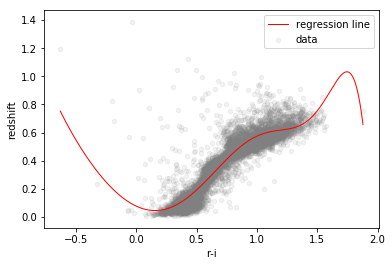

In [55]:
fig, ax = plt.subplots()
train_data.plot.scatter(dim,'redshift',color='gray',alpha=0.1,label='data',ax=ax)
ax.plot(x_vals,y_pred, color='red', linewidth=1.0, label='regression line')
plt.legend()

<BarContainer object of 11 artists>

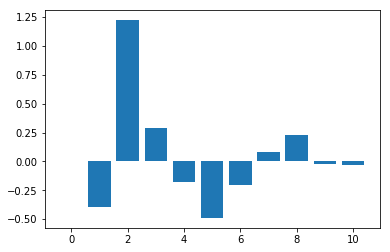

In [56]:
plt.bar(range(len(poly_regression.coef_)),poly_regression.coef_)


### c) See how regularization works
* Pack the code into a function that recieves the degree and the alpha parameter of regularization
* If you have not, you need to give the alpha parameter to the regression
* Use interact to play with the two values ($d \in [2,15]$, $\alpha \in [0,1]$)
* Do the same for LASSO regularization

In [57]:
def train_and_plot(d=10,a=0.0):
    gen_poly_terms = PolynomialFeatures(degree=d)
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    poly_regression = Ridge(alpha=a)
    poly_regression.fit(X_train_with_poly, y_train)
    poly_vals=gen_poly_terms.transform(x_vals)
    y_pred=poly_regression.predict(poly_vals)
    fig, ax = plt.subplots()
    train_data.plot.scatter(dim,'redshift',color='gray',alpha=0.1,label='data',ax=ax)
    ax.plot(x_vals,y_pred, color='red', linewidth=1.0, label='regression line')
    plt.legend()
    plt.figure()
    plt.bar(range(len(poly_regression.coef_)),poly_regression.coef_)

In [62]:
def train_and_plot_lasso(d=10,a=0.0):
    gen_poly_terms = PolynomialFeatures(degree=d)
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    poly_regression = Lasso(alpha=a)
    poly_regression.fit(X_train_with_poly, y_train)
    poly_vals=gen_poly_terms.transform(x_vals)
    y_pred=poly_regression.predict(poly_vals)
    fig, ax = plt.subplots()
    train_data.plot.scatter(dim,'redshift',color='gray',alpha=0.1,label='data',ax=ax)
    ax.plot(x_vals,y_pred, color='red', linewidth=1.0, label='regression line')
    plt.legend()
    plt.figure()
    plt.bar(range(len(poly_regression.coef_)),poly_regression.coef_)

In [66]:
from ipywidgets import interact
interact(train_and_plot_lasso,d=(2,15),a=(0.0,0.1,0.001))

interactive(children=(IntSlider(value=10, description='d', max=15, min=2), FloatSlider(value=0.0, description=…

<function __main__.train_and_plot_lasso(d=10, a=0.0)>

## 2.- Linear Regression... without training wheels

### Objective

As an exercise lets do a linear regression without training wheels:
* <b>Left wheel</b>: $x \in \mathbb{R}$ --> $\mathbf{x} \in \mathbb{R}^n$ variable
* <b>Right wheel</b>: `scikit-learn` package --> just `pandas`, `numpy` and `scipy`

### Theory
What is a linear model?
$$ y = f(\mathbf{x};\mathbf{w}) = \sum_j w_j \phi_j(\mathbf{x}) = \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}) $$

Examples:
* Polinomial: $\phi_j(\mathbf{x}) = \|\mathbf{x}\|^j$
* Gaussian: $\phi_j(\mathbf{x}) = \exp\left\{\frac{- \|\mathbf{x} - \boldsymbol{\mu}_j\|^2}{2s^2}\right\}$
* Sigmoidal: $\phi_j(\mathbf{x}) = \sigma\left(\frac{\|\mathbf{x} - \boldsymbol{\mu}_j\|}{s}\right)= \frac{1}{1 + \exp\left( \frac{-\|\mathbf{x} - \boldsymbol{\mu}_j\|}{s}\right)}$

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

def show_gaussian(mu=0.0,s=1.0):
    a = np.arange(-10, 10, 0.1)
    plt.plot(a, np.exp(-(a-mu)**2/(2*s**2)))
interact(show_gaussian,mu=(-2.0,2.0),s=(0.1,10))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.show_gaussian(mu=0.0, s=1.0)>

In [68]:
def show_sigmoid(mu=0.0,s=1.0):
    a = np.arange(-10, 10, 0.1)
    plt.plot(a, 1./(1. + np.exp(-(a-mu)/s)))
interact(show_sigmoid,mu=(-2.0,2.0),s=(0.1,10))

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.show_sigmoid(mu=0.0, s=1.0)>

Imagine you fix every $\mu_j$ and $s$. 

<b>How we can learn</b> $\mathbf{w}$ (assuming Gaussian noise $\epsilon \sim N(\mu,\sigma)$)?

$$\begin{align} Pr(Y \mid \mathbf{X},\mathbf{y}) &= \prod_i \mathcal{N}(Y = y_i \mid f(\mathbf{x}_i;\mathbf{w}),\sigma)\\ &= \prod_i \mathcal{N}(Y = y_i \mid \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i),\sigma)\end{align} $$

We want to maximize this probability

$$ \begin{align} \ln Pr(Y \mid \mathbf{X},\mathbf{y}) & = \sum_i \ln \mathcal{N}(Y = y_i \mid \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i),\sigma)\\ & \propto \sum_i\left( y_i - \mathbf{w}^\textrm{T} \boldsymbol{\phi}(\mathbf{x}_i)\right)^2 \end{align} $$

If we compute the gradient of this
$$ \begin{align} \nabla\ln Pr(Y \mid \mathbf{X},\mathbf{y}) & = \sum_i\left( y_i - \mathbf{w}^\textrm{T}\boldsymbol{\phi}(\mathbf{x}_i)\right)\boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T} \\
\nabla\ln Pr(Y \mid \mathbf{X},\mathbf{y}) &= \mathbf{0} \\
\sum_i y_i \boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T} &= \mathbf{w}^\textrm{T}\sum_i\boldsymbol{\phi}(\mathbf{x}_i)\boldsymbol{\phi}(\mathbf{x}_i)^\textrm{T}\\
\mathbf{y}^\textrm{T}\boldsymbol{\Phi} &= \mathbf{w}^\textrm{T}\boldsymbol{\Phi}\boldsymbol{\Phi}^\textrm{T}\\
\mathbf{w} &= (\boldsymbol{\Phi}^\textrm{T}\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\textrm{T}\mathbf{y}
\end{align}$$

The $\boldsymbol{\Phi}$ is called the <b>Design Matrix</b> and have the form:
$$\begin{bmatrix}
1 & \phi_1(\mathbf{x}_1) & \phi_2(\mathbf{x}_1) & \ldots & \phi_m(\mathbf{x}_1)\\
1 & \phi_1(\mathbf{x}_2) & \phi_2(\mathbf{x}_2) & \ldots & \phi_m(\mathbf{x}_2)\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & \phi_1(\mathbf{x}_n) & \phi_2(\mathbf{x}_n) & \ldots & \phi_m(\mathbf{x}_n)
\end{bmatrix}$$

## Exercise
### a) Use now ALL the dimensions now and select $\mu$'s 
* Check if you have all the dimensions of the training and validation sets (not one like in the previous example)
* Resample to n=1000 o similar for working
* Select 20 points of the training sample to use a $\mu$ values
* It will be handy for later doing this in a function, recieving the number of total samples $(n,m)$

In [95]:
def get_matrices(n,m):
    gal_sample = galaxy_feat.sample(n=n,random_state=0)
    train_data = gal_sample[:int(len(gal_sample)*0.5)]
    test_data = gal_sample[int(len(gal_sample)*0.5):]
    X=train_data[['u-g','g-r','r-i','i-z']]
    y=train_data['redshift']
    mu=X.sample(n=m,random_state=0)
    Xp=test_data[['u-g','g-r','r-i','i-z']]
    yp=test_data['redshift']
    return(X,y,mu,Xp,yp)

### b) Construct your own design matrix
* Choose a not so trivial kernel (i.e. Gaussian/Sigmoidal)
* Do not obsess with speed... yet. Just give a solution.
* If you have dissmissed the previous recommendation, use the L2-norm $\|\cdot\|_2$ and remember that
$$ (\mathbf{a} - \mathbf{b})^\textrm{T}(\mathbf{a} - \mathbf{b}) = \mathbf{a}^\textrm{T}\mathbf{a} + \mathbf{b}^\textrm{T}\mathbf{b} - 2\mathbf{a}^\textrm{T}\mathbf{b} $$ and remember to round up to 10 decimals
* (Optional) Plot the 20 first rows of the matrix using `plt.imshow`

In [96]:
def design_matrix(X,mu,s,func):
    vx   = (X*X).sum(axis=1)
    vmu  = (mu*mu).sum(axis=1)
    Mxmu = X.dot(mu.T)
    A=np.tile(vx,((len(vmu),1))).T
    B=np.tile(vmu,((len(vx),1)))
    C=Mxmu
    
    D=A + B -2*C
    D=np.around(D,decimals=10)
    N=np.sqrt(D)
    N=func(N,s)
    N=np.concatenate([np.ones((len(X),1)),N], axis=1)
    return N

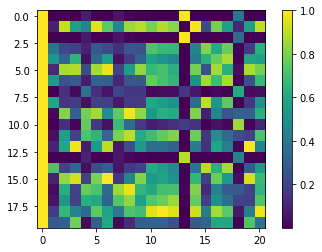

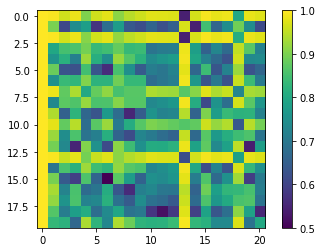

In [97]:
gauss = lambda x,s: np.exp(-(x)**2/(2*s**2))
sigmo = lambda x,s:1./(1. + np.exp(-x/s))

X,y,mu,Xp,yp = get_matrices(1000,20)

plt.imshow(design_matrix(X,mu,1.0,gauss)[:20])
plt.colorbar()
plt.figure()
plt.imshow(design_matrix(X,mu,1.0,sigmo)[:20])
plt.colorbar()

### c) Train and Predict
* Get a design matrix
* Compute $\mathbf{w} = (\boldsymbol{\Phi}^\textrm{T}\boldsymbol{\Phi})^{-1}\boldsymbol{\Phi}^\textrm{T}\mathbf{y}$ using `scipy.linal` package for computing the inverse. Remember that this model is not regularized, so compute the pseudo-inverse.
* Get the "predictions" for the training data $\mathbf{w}^\textrm{T}\boldsymbol{\Phi}_\mathbf{X}$
* Get the predictions for the test/validation data $\mathbf{w}^\textrm{T}\boldsymbol{\Phi}_\mathbf{X'}$
* Do a scatter plot of the real redshifts of the training set against the 'u-g' dimension in blue
* Use the same plot to show the predicted redshifts values of the training set.
* Create a new figure for the test/validation data
* Did you put all this in a function?

In [98]:
from scipy import linalg
def train_and_predict(X,y,mu,Xp,yp,s,func):
    # Get the design matrix
    P=design_matrix(X,mu,s,func)
    # Get the weights
    w=linalg.pinv(P.T.dot(P)).dot(P.T).dot(y)
    # Predict 
    pred_y = P.dot(w)
    Pp = design_matrix(Xp,mu,s,func)
    pred_yp = Pp.dot(w)
    return (pred_y,pred_yp)

In [99]:
X,y,mu,Xp,yp     = get_matrices(n,20)
(pred_y,pred_yp) = train_and_predict(X,y,mu,Xp,yp,1.0,gauss)

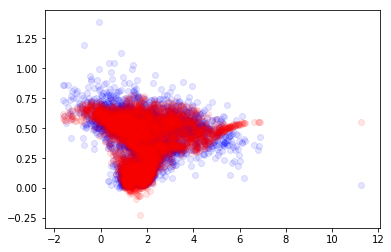

In [100]:
plt.scatter(X['u-g'],y,c='blue',alpha=0.1)
plt.scatter(X['u-g'],pred_y,c='red',alpha=0.1)

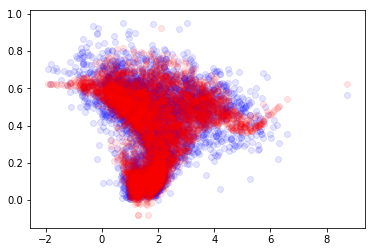

In [75]:
plt.scatter(Xp['u-g'],yp,c='blue',alpha=0.1)
plt.scatter(Xp['u-g'],pred_yp,c='red',alpha=0.1)

### d) Computing the RMS errors
* Compute the RMS error for the training and validation/test set: $RMS = \sqrt{\frac{\sum_i^n (y_i - y_i')^2}{n}}$
* Plot the error for $s \in [0.1,5]$
* Plot the error for $n \in [100,10000]$ step = 100
* Plot the error for $m \in [10,100] $ step = 1

In [101]:
def get_errors(n,m,s,func):
    X,y,mu,Xp,yp     = get_matrices(n,m)
    (pred_y,pred_yp) = train_and_predict(X,y,mu,Xp,yp,s,func)
    return (linalg.norm(pred_y - y)/np.sqrt(len(y)),linalg.norm(pred_yp - yp)/np.sqrt(len(yp)))

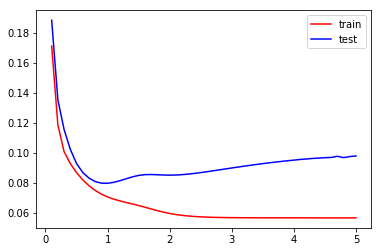

In [102]:
sspace = np.linspace(0.1,5)
train_error=[]
test_error=[]
for s in sspace:
    (tne,tse)=get_errors(1000,20,s,gauss)
    train_error.append(tne)
    test_error.append(tse)
plt.plot(sspace,train_error,label='train',c='red')
plt.plot(sspace,test_error,label='test',c='blue')
plt.legend()

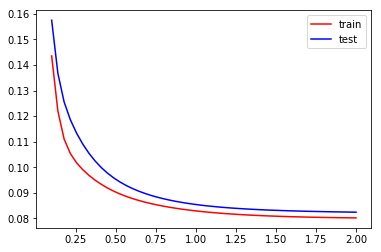

In [104]:
sspace = np.linspace(0.1,2)
train_error=[]
test_error=[]
for s in sspace:
    (tne,tse)=get_errors(1000,20,s,sigmo)
    train_error.append(tne)
    test_error.append(tse)

plt.plot(sspace,train_error,label='train',c='red')
plt.plot(sspace,test_error,label='test',c='blue')
plt.legend()

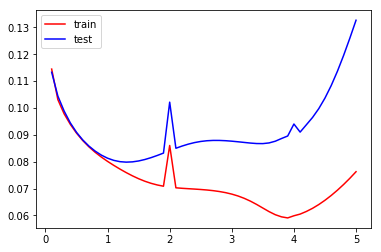

In [106]:
sspace = np.linspace(0.1,5)
train_error=[]
test_error=[]
for s in sspace:
    (tne,tse)=get_errors(1000,20,s,lambda x,s:x**s)
    train_error.append(tne)
    test_error.append(tse)
plt.plot(sspace,train_error,label='train',c='red')
plt.plot(sspace,test_error,label='test',c='blue')
plt.legend()

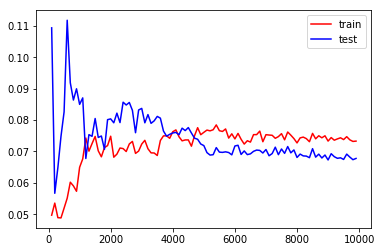

In [107]:
nspace = range(100,10000,100)
train_error=[]
test_error=[]
for n in nspace:
    #print(n)
    (tne,tse)=get_errors(n,20,1.5,gauss)
    train_error.append(tne)
    test_error.append(tse)

plt.plot(nspace,train_error,label='train',c='red')
plt.plot(nspace,test_error,label='test',c='blue')
plt.legend()
    

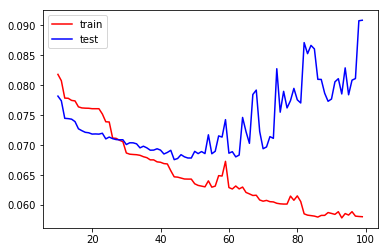

In [84]:
mspace = range(10,100,1)
train_error=[]
test_error=[]
for m in mspace:
    (tne,tse)=get_errors(5000,m,1.5,gauss)
    train_error.append(tne)
    test_error.append(tse)

plt.plot(mspace,train_error,label='train',c='red')
plt.plot(mspace,test_error,label='test',c='blue')
plt.legend()
    

## 3.- Logistic "Regression"... into the bikeway
### Objective
* Use regression models to classify (everything is connected)
* Exercise the use of metrics
* Learn the importance of understanding the model

### Theory

Let us explore the following idea:
$$\sigma(\mathbf{w}^\textrm{T}\mathbf{x}) = \frac{1}{1+\exp(-\mathbf{w}^\textrm{T}\mathbf{x})}$$

In [108]:
def logistic2D(w1=1,w2=1,w3=1):
    w = [w1, w2, w3]
    x1_g, x2_g = np.meshgrid(np.arange(-5., 5.0, 0.1),np.arange(-5., 5.0, 0.1))
    y = w[0] + w[1]*x1_g + w[2]*x2_g
    plt.contourf(x1_g, x2_g, 1./(1.+np.exp(-y)), cmap=plt.cm.seismic, levels = np.arange(0, 1.1, 0.05))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.colorbar()
interact(logistic2D,w1=(-5,5),w2=(0.001,1.),w3=(0.001,1.))

interactive(children=(IntSlider(value=1, description='w1', max=5, min=-5), FloatSlider(value=1.0, description=…

<function __main__.logistic2D(w1=1, w2=1, w3=1)>

Lets use our linear model under a sigmoid function $\sigma$ to separate classes then! 

Let $\phi(\boldsymbol{x}) = \boldsymbol{\phi}$

$Pr(Y = c_1 \mid \boldsymbol{x}) = \sigma(\boldsymbol{w}^\top\boldsymbol{\phi})$

Reciprocaly

$Pr(Y = c_2 \mid \boldsymbol{x}) = 1-\sigma(\boldsymbol{w}^\top\boldsymbol{\phi})$

<!-- 
Note that:

$\sigma(-a) = 1 - \sigma(a)$

So...


$\boldsymbol{w}^\top\boldsymbol{\phi} = \ln\left(\frac{Pr(Y=c_1\mid\boldsymbol{x})}{Pr(Y=c_2\mid\boldsymbol{x})}\right)$,
-->


Let us define $c_1 = 1$ and $c_2 = 0$ just because... then,

$Pr(Y=y\mid\boldsymbol{x}) = \sigma(\boldsymbol{w}^\top\boldsymbol{\phi})^y (1 - \sigma(\boldsymbol{w}^\top\boldsymbol{\phi}))^{1-y}$

If we try to compute the log likelihood for a training data

$$ E(\boldsymbol{w}) = \ln Pr(\mathbf{Y}=\mathbf{y}\mid\boldsymbol{X},\boldsymbol{w}) = \sum_i \left\{y_i \ln( \sigma(\boldsymbol{w}^\top\boldsymbol{\phi}_i)) + (1-y_i)\ln(1 - \sigma(\boldsymbol{w}^\top\boldsymbol{\phi}_i))\right\}$$

Then, the gradient looks nice...

$\nabla E(\boldsymbol{w}) = \sum_{i}(\sigma(\boldsymbol{w}^\top\boldsymbol{\phi}_i)) - y_n)\boldsymbol{\phi} = 0$ 

but is no closed form to solve this, so we use iterative methods to solve them (numerical optimization methods such as Newton-Raphson). 

Obviously, Mr. Scikit Learn have coded that for us... [link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## Exercise

### a) Load and balance the SDSS stars dataset (RRLyrae)
* Load the dataset, put names to the columns
* Find out how imbalanced is the dataset
* Subsample the class of non-variable stars to the same size of the other class

In [86]:
from astroML.datasets import fetch_rrlyrae_combined
sdss_star_feat, sdss_star_type = fetch_rrlyrae_combined()

In [87]:
star_feat=pd.DataFrame(sdss_star_feat)
star_feat.columns=['u-g', 'g-r', 'r-i', 'i-z']
star_feat['Type']=sdss_star_type

In [88]:
star_feat['Type'].sum()

483.0

In [89]:
class_1 = star_feat[star_feat['Type']==1]
class_2 = star_feat[star_feat['Type']==0].sample(len(class_1));
X = class_1.append(class_2)
y = X['Type']
X = X[['u-g', 'g-r', 'r-i', 'i-z']]

### b) Train and Evaluate a Logistic Regression Classifier (LRC)
* Train the LRC with the balanced data
* Predict the classes for the same data
* Compute the completeness and contamination 

In [90]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)

/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
def comp_cont(y,y_pred):
    TP = (y[y_pred==1]==1).sum()
    FP = (y[y_pred==1]==0).sum()
    TN = (y[y_pred==0]==0).sum()
    FN = (y[y_pred==0]==1).sum()
    return (TP/(TP+FN),FP/(TP+FP))
print(comp_cont(y,y_pred))

(0.989648033126294, 0.018480492813141684)


### c) Incrementally include the rest of the data
* Create a function that trains and predicts depending on the number of samples used for subsampling the non-variables class. This function should return the completeness and contamination.
* Plot the behaviour of the completeness and contamination as you increase the number of samples of the non-variables class. I recommend steps of 500. 
* Plot also the parameters of the model using bars
* What is your explanation for this result? can we do something about it?

In [93]:
def get_measures(ns):
    class_1 = star_feat[star_feat['Type']==1]
    class_2 = star_feat[star_feat['Type']==0].sample(ns);
    X = class_1.append(class_2)
    y = X['Type']
    X = X[['u-g', 'g-r', 'r-i', 'i-z']]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X,y)
    y_pred = logreg.predict(X)
    (com,con)=comp_cont(y,y_pred)
    return (com,con,logreg.coef_)

/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mauricio/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

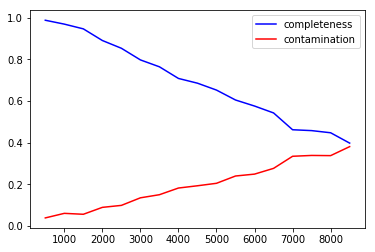

In [94]:
nsspace = range(500,9000,500)
com_list=[]
con_list=[]
for ns in nsspace:
    (com,con,coef)=get_measures(ns)
    com_list.append(com)
    con_list.append(con)

plt.plot(nsspace,com_list,label='completeness',c='blue')
plt.plot(nsspace,con_list,label='contamination',c='red')
plt.legend()

In [ ]:
plt.figure()
plt.bar(range(len(coef[0])),coef[0])

In [ ]:
    #logreg = linear_model.LogisticRegression(penalty='l1',C=100)

